# Comparing FFT's of different signals

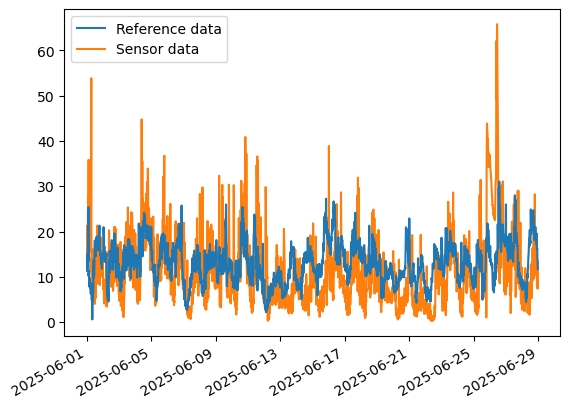

'\nfig2, ax2 = plt.subplots()\nlNO2.plot(ax=ax2)\nsNO2.plot(ax=ax2)\nplt.show()\n\nfig3, ax3 = plt.subplots()\nlPM10.plot(ax=ax3)\nsPM10.plot(ax=ax3)\nplt.show()'

In [ ]:
import load_data
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from functions.data_processing import resample_and_match
from utils_new import align_and_resample
import API_tools

ref_file = "data/refdata/svea_ref.json"
ref_data, ref_desc = load_data.load_slb_data(ref_file)

sensor_file = "data/sensordata/svea_NO2.csv"
sensor_data = API_tools.load_csv(sensor_file)

start = dt(2025,3,1)
end = dt(2025,3,30)

ref_NO = ref_data["NO2"]
sensor_NO = sensor_data["NO2"]

[ref,data]=resample_and_match(sensor_NO.to_frame(),ref_NO.to_frame(),'15min')

ax=ref.plot(zorder=2)
data.plot(ax=ax,zorder=1)
plt.legend(["Reference data","Sensor data"])
plt.show()

## LP-filtering

62.59410050227665


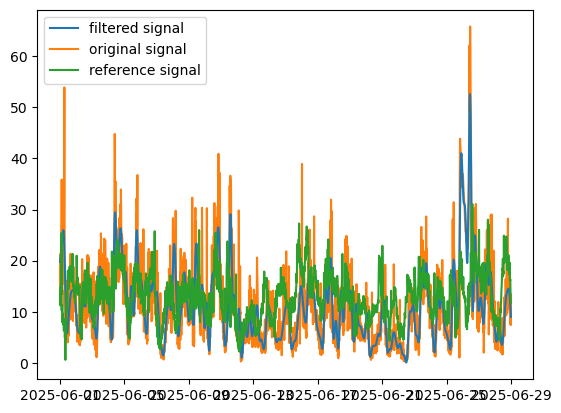

In [ ]:
import utils_new

dates, filtered_sig = utils_new.lp_filter(data,15,0.0003)

plt.plot(dates, filtered_sig, zorder=2)
plt.plot(dates, data, zorder=1)
plt.plot(ref)
plt.legend(["filtered signal","original signal","reference signal"])

mse = utils_new.calculate_mse(filtered_sig, ref.to_numpy())
print(mse)

mse = utils_new.calculate_mse(ref.to_numpy(), data.to_numpy())
"""print(mse)"""

(0.0, 0.001)

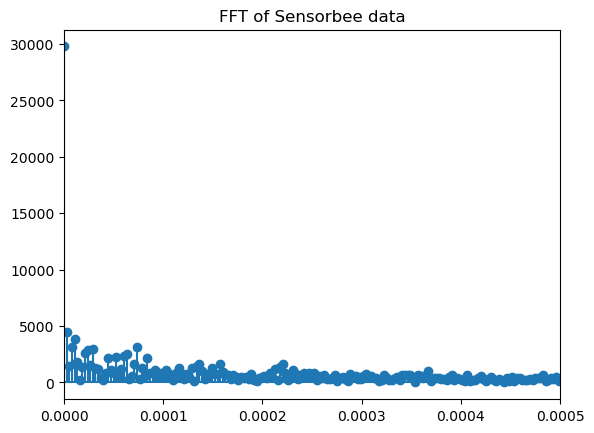

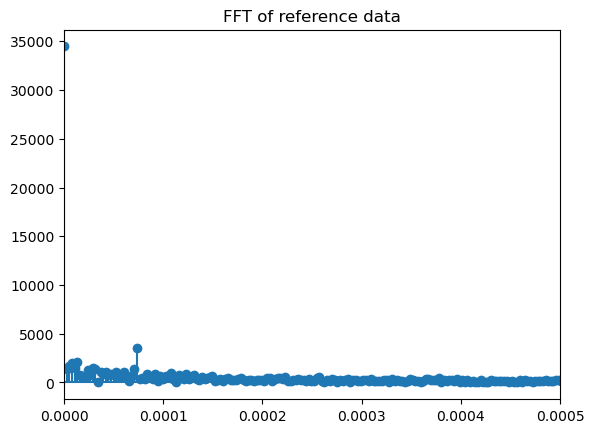

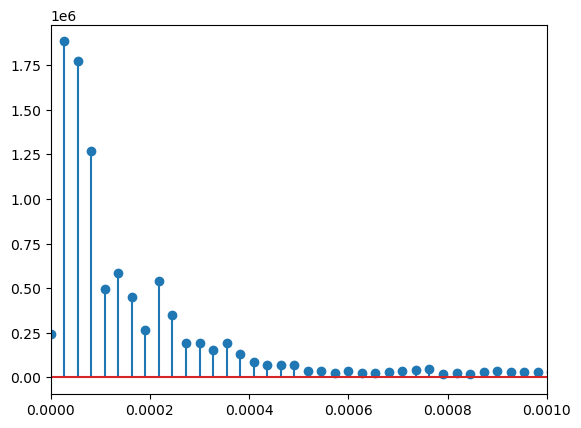

In [96]:
fs = 1/(15*60)
N = len(data)
n = np.arange(N)

YS = np.fft.fft(data.to_numpy().flatten())
YL = np.fft.fft(ref.to_numpy().flatten())

plt.figure(0)
plt.stem(2*np.pi*fs*n/N,np.abs(YS),basefmt="")
plt.xlim(0,0.0005)
plt.title("FFT of Sensorbee data")

plt.figure(1)
plt.stem(2*np.pi*fs*n/N,np.abs(YL),basefmt="")
plt.xlim(0,0.0005)
plt.title("FFT of reference data")

from scipy.signal import welch

plt.figure(2)
f, psd = welch(data.to_numpy().flatten(), fs, window='hamming')
plt.stem(f*2*np.pi,psd)
plt.xlim(0,0.001)


